# Matplotlib Advanced - Bells & Whistles
 

####  Review and Outline

Great Work! We now know how to create graphs via the two standard approaches, and some basic graph options, but if we're honest with ourselves we'd admit they're far from enough. 

In fact, we just got started. We have a huge number of methods available for changing our plots in any way we wish for the purpose of production-grade plots: Choose the most suitable type of for data, Change axis limits, and many other things that haven't crossed our minds yet. At first we will learn a short introduction in terms of types of charts in this package.

In the end, we will focus on the question **How does GDP and it's expenditure componenets co-move?** I'll set it up like a mini-project for data visualization and gradually using advanced graphs options to make the graph look better. 

[This notebook largely follows the discussion in the Book.](https://nyudatabootcamp.gitbook.io/thebook/graphs1)

**Pay attention to the link, we when have two chapters, we will need to update the links**

#### Python

In this notebook, we will learn how to (i) choose different graphes and then (ii) use the methods associated with `fig` and `ax` objects to manipulate the properties of the figure to make it informative and nice looking. 

**Buzzwords.** Data visualization, Heatmap


In [1]:
# Loading the packages

import pandas as pd                 # Our pandas package

# In order to use the pandas_datareader, we have the following lines of code, hard to explain.
# New version for pandas. In the past, we used pandasdatareader, but might be not working anymore
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data  # This is will give us access to FRED
import datetime as dt               # This will get us the datatime package
import matplotlib.pyplot as plt     # The new package we are learning about Matplotlib
                                    # pyplot is just one module of many in this library

%matplotlib inline 
# This line tells jupyter to plot the graphs within the notebook

---
## Loading Data


In [2]:
gdp  = [13271.1, 13773.5, 14234.2, 14613.8, 14873.7, 14830.4, 14418.7,
        14783.8, 15020.6, 15369.2, 15710.3]
pce  = [8867.6, 9208.2, 9531.8, 9821.7, 10041.6, 10007.2, 9847.0, 10036.3,
        10263.5, 10449.7, 10699.7]
year = list(range(2003,2014))        # use range for years 2003-2013

# Note that we set the index
us = pd.DataFrame({'gdp': gdp, 'pce': pce}, index=year)
print(us)

code    = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
country = ['United States', 'France', 'Japan', 'China', 'India',
             'Brazil', 'Mexico']
gdppc   = [53.1, 36.9, 36.3, 11.9, 5.4, 15.0, 16.5]

wbdf = pd.DataFrame({'gdppc': gdppc, 'country': country}, index=code)

print(wbdf)

          gdp      pce
2003  13271.1   8867.6
2004  13773.5   9208.2
2005  14234.2   9531.8
2006  14613.8   9821.7
2007  14873.7  10041.6
2008  14830.4  10007.2
2009  14418.7   9847.0
2010  14783.8  10036.3
2011  15020.6  10263.5
2012  15369.2  10449.7
2013  15710.3  10699.7
           country  gdppc
USA  United States   53.1
FRA         France   36.9
JPN          Japan   36.3
CHN          China   11.9
IND          India    5.4
BRA         Brazil   15.0
MEX         Mexico   16.5


---
## Graph Types

It is always a difficult problem to choose the suitable when visualizing data. But it is even worse that we do not know how many different types of the charts the `matplotlib` can do. So now let's explore this a little bit and build our knowledge piece by piece.

In addition, we still do not know how to add the titles, axis lables and other features to the graph now. It is okay because we will learn that in a minute!

### Line Charts

For the line charts, it is almost a review of the eariler session, the most fundamental ones. 

It is most suitable for analyzing the time trends in our dataset but is usually not a great tool for cross sectional data.

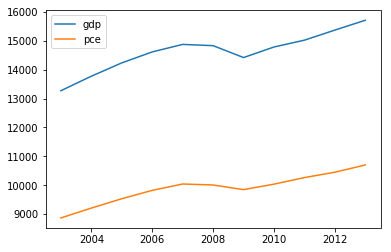

In [3]:
fig, axe = plt.subplots()        # create axis object axe
us.plot(ax=axe)                  # ax= looks for axis object, axe is it

### Bar Charts

Again, we usually see this a lot. 

It is most suitable for comparing feature values of each observation in our cross sectional data. It is usually not a great tool for time series analysis.

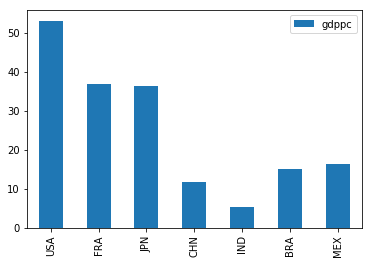

In [4]:
fig, axe = plt.subplots()        # create axis object axe
wbdf.plot.bar(ax=axe)           # ax= looks for axis object, axe is it

We can also easily convert the bars horizontally, namely via `barh` function, where `h` stands for *horizontal*, pretty intuitive, right?

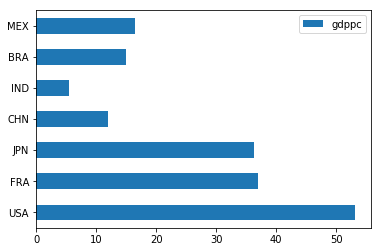

In [5]:
fig, axe = plt.subplots()        # create axis object axe
wbdf.plot.barh(ax=axe)           # ax= looks for axis object, axe is it

Next we are going to learn graphs for describing the **distributions** of the variates.


### Histgrams 


Sometimes, we want to know the empirical distributions of a univariate. For example, when analyzing the income inequality of a country, we'll usually start with plotting the distributions of income. So that we can sense how far the left/right tail is and where is the mean/median. This is where the **histgrams** kick in.

This graph seems mysteries at first since it requires a little bit calculations but with a short introduction, you will find it easy to understand and master. 


There always two steps for constructing the histgrams (you don't have to do computings when using the package):

* Deciding how many bins you want to have. This will be our x-axis after some computations.

* Then in each bin, we can compute how many data points are within a range. This is our value - frequency in y-axis.

So now we know that the most important parameters for a bin graph is **bins** in `matplotlib` hist function, it controls how many bins we want to have and thus the frequency of observations in each bin.

In the end, we have the following example to further illustrate the idea.



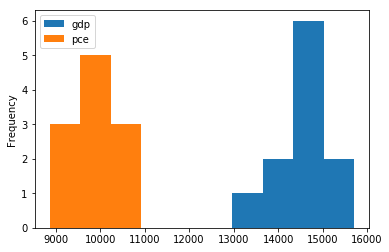

In [6]:
fig, axe = plt.subplots()        # create axis object axe
us.plot.hist(ax=axe)           # ax= looks for axis object, axe is it

We could see from the histograms that the two variates have relatively different distributions with pce centered around **10000** while gdp at **14500**. Besides, the gdp variate have a little bit right skewness. 

As we all know, the bins are decided by the ranges of the data. Let's try how will it change when we motify the number of bins. This number **matters**!

Normally we use the default as a starting point!

Too small number of bins...

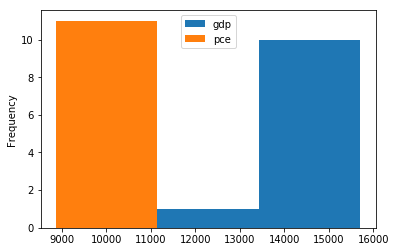

In [7]:
fig, axe = plt.subplots()        # create axis object axe
us.plot.hist(ax=axe,bins=3)           # ax= looks for axis object, axe is it

Too many bins ... 

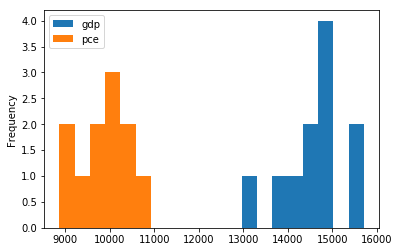

In [8]:
fig, axe = plt.subplots()        # create axis object axe
us.plot.hist(ax=axe,bins=20)           # ax= looks for axis object, axe is it

#### Scatter
It is a way of showing the multivariates' relationships or distributions in the data. 

In the following example, we almost see a linear relationship between the two variates. 

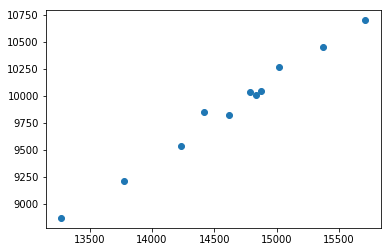

In [9]:
fig, axe = plt.subplots()        # create axis object axe
axe.scatter(x=us['gdp'],y=us['pce']) 


#### Advanced Scatter Charts

Now seeing the relationship, we are eager to see if we can do a curve fiting on it? Yes... But we have to do it manually. Here we use the `polyfit` function from `numpy` package.


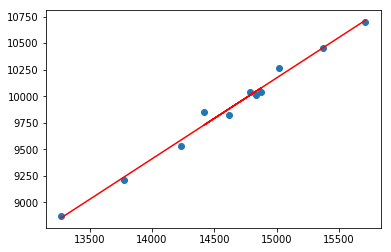

In [10]:
# first we import a polyfit function from numpy
from numpy.polynomial.polynomial import polyfit
x=us['gdp']
y=us['pce']

# we poly fit the data
b, m = polyfit(x, y, 1)

# Plot both the fitting results and the original data
fig, axe = plt.subplots()        # create axis object axe
axe.scatter(x,y) 
axe.plot(x, b+ m*x,'r')

### Pie

This type of chart can often be used to show the composition of something. Here we will again use the `wbdf` dataset and present a composition of the world GDP. In addition, we can compare each country's contributions more directly and intuitively.



([<matplotlib.patches.Wedge at 0x1230106a0>,
 [Text(0.637429,0.896484,'United States'),
  Text(-0.923629,0.597419,'France'),
  Text(-0.81291,-0.741065,'Japan'),
  Text(0.0365048,-1.09939,'China'),
  Text(0.37055,-1.03571,'India'),
  Text(0.716679,-0.834489,'Brazil'),
  Text(1.05215,-0.320906,'Mexico')])

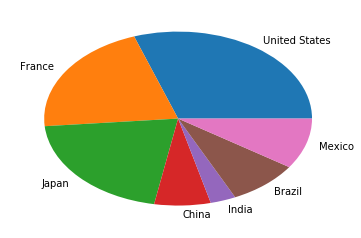

In [11]:
fig, axe = plt.subplots()        # create axis object axe
axe.pie(x=wbdf['gdppc'],labels=wbdf['country'])           # ax= looks for axis object, axe is it

### Area Charts

An area chart is basically a line chart, but the space between the x-axis and the line is filled with a color or pattern. It is useful for showing part-to-whole relations. It helps you analyze both overall and individual trend information.

For example, even though both gdp and pce are increasing, but the percentage of gdp/pce is smaller in 2012 than in 2004 as we can see the relative areas changing.

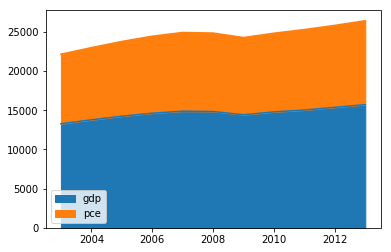

In [12]:
fig, axe = plt.subplots()        # create axis object axe
us.plot.area(ax=axe)            # ax= looks for axis object, axe is it

### Heat Maps


According [wiki](https://en.wikipedia.org/wiki/Heat_map), it is a graphical representation of data where the individual values contained in a matrix are represented as colors. 

The most frequent used examples I can think about is the correlation matrix. It provides a very quick way to visualize the correlations among features. 

In addition, Heatmap is better programmed via `seaborn`, another python plotting package. 


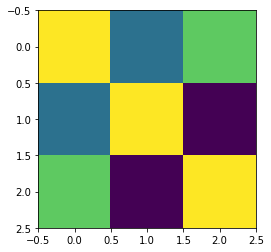

In [13]:
# Prepare the correlation Matrix
import numpy as np
correlateions = np.array([[1,0.5,0.8],[0.5,1,0.2],[0.8,0.2,1]])

fig, ax = plt.subplots()
im = ax.imshow(correlateions)

---
## Graph Options

### Basic Functionalities

First of all, let's have a quick review regarding the graph basic options listed below:

* How to set axis labels?
* How to set titles?
* How to set the legends?


**Getting ready for the data...**

In [14]:
start = dt.datetime(2000,1,1) # Our start date

codes = ["GDPC1", "PCECC96", "GPDIC1", "GCEC1","EXPGSC1","IMPGSC1"] # Our codes

usdata = data.DataReader(codes, "fred", start)                 # Read  in the data

usdata.columns = ["gdp", "cons","invs", "gov", "exp", "imp"]   # Rename the columns in a simple way

usdata.head() # Look at it

,gdp,cons,invs,gov,exp,imp
DATE,,,,,,
2000-01-01,12924.179,8520.710,2257.109,2645.393,1337.203,1853.884
2000-04-01,13160.842,8603.007,2390.733,2671.254,1375.203,1911.437
2000-07-01,13178.419,8687.485,2367.274,2659.687,1408.783,1978.137
2000-10-01,13260.506,8762.205,2371.809,2675.695,1396.844,1977.750
2001-01-01,13222.690,8797.280,2264.202,2716.773,1376.171,1946.136


**A little more computations...**

In [15]:
var_list = ["gdp", "cons"]

for var in var_list:
    new_name = var + "_growth"
    usdata[new_name] = 100*4*usdata[var].pct_change()
    
usdata.head()

,gdp,cons,invs,gov,exp,imp,gdp_growth,cons_growth
DATE,,,,,,,,
2000-01-01,12924.179,8520.710,2257.109,2645.393,1337.203,1853.884,NaN,NaN
2000-04-01,13160.842,8603.007,2390.733,2671.254,1375.203,1911.437,7.324659,3.863387
2000-07-01,13178.419,8687.485,2367.274,2659.687,1408.783,1978.137,0.534221,3.927836
2000-10-01,13260.506,8762.205,2371.809,2675.695,1396.844,1977.750,2.491558,3.440351
2001-01-01,13222.690,8797.280,2264.202,2716.773,1376.171,1946.136,-1.140711,1.601195


##### Making it look more formative... Please pay attention to the additional codes


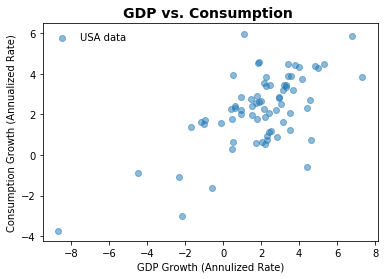

In [16]:
fig, ax = plt.subplots() # Same deal here...

ax.scatter(usdata["gdp_growth"], usdata["cons_growth"],     # x,y variables 
            alpha= 0.50) # Then this last command specifies how dark or light the bubbles are...

##################################################################################

ax.set_title('GDP vs. Consumption ', loc='center', fontsize=14, fontweight = "bold") 
# We know this, but note the new option, it specifies the location....

ax.set_xlabel("GDP Growth (Annulized Rate)")
ax.set_ylabel("Consumption Growth (Annualized Rate)")

# Here the legend might not be important, but thinking about what if you 
# have two countries
ax.legend(["USA data"],frameon=False) # The legend, without a box...



#### Setting limits and saving graph

Now we are ready for setting xlim, ylim, and other handy graph details...

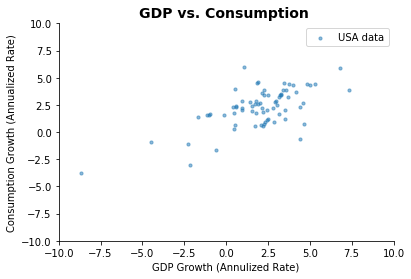

In [17]:
fig, ax = plt.subplots() # Same deal here...

ax.scatter(usdata["gdp_growth"], usdata["cons_growth"],     # x,y variables 
            alpha= 0.50,
           s=10) # Then this last command specifies how large the bubbles are...
                # Here we make it smaller

ax.set_title('GDP vs. Consumption ', loc='center', fontsize=14, fontweight = "bold") 
# We know this, but note the new option, it specifies the location....

ax.set_xlabel("GDP Growth (Annulized Rate)")
ax.set_ylabel("Consumption Growth (Annualized Rate)")

# Here the legend might not be important, but thinking about what if you 
# have two countries
ax.legend(["USA data"],frameon=True) # The legend, with a box...

##################################################################################
# This is the new stuff...

ax.set_ylim(-10,10) # This sets the y-limits
ax.set_xlim(-10,10) # This sets the x-limits

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

###### Saving the results to the folder where the notebook it is.
fig.savefig("us_gdp_consumption.png", bbox_inches = "tight", dip = 1200)


### Advanced Functionalities

So far, we have learned the basic options to make your graph look nicer and closer to publication quality level. Here we will use several other stuffs as well.

* Annotation
* Subplots/Multiple plots
* Styles

Let's start with Annotation!


#### Annotation

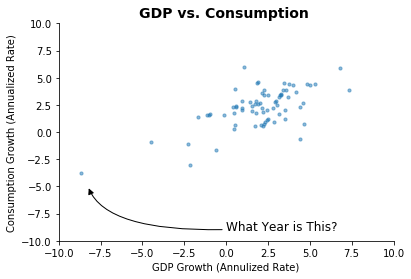

In [18]:
# Again, lets make this informative...
fig, ax = plt.subplots()
ax.scatter(usdata["gdp_growth"], usdata["cons_growth"],     
            alpha= 0.50,
           s=10) 
    
ax.set_title('GDP vs. Consumption ', loc='center', fontsize=14, fontweight = "bold") 

ax.set_xlabel("GDP Growth (Annulized Rate)")
ax.set_ylabel("Consumption Growth (Annualized Rate)")

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

ax.set_ylim(-10,10) # Make this a box...why, one can then by eye infer the slope...
ax.set_xlim(-10,10) # 

############################################################################
# This is something new I learned recently

ax.annotate(
    "What Year is This?", 
    xy=(-8.25, -5), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(0, -9), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=5,angleB=110",
        "color": "black"
    },
    fontsize=12,
)

############################################################################

plt.show()

#### Subplots

This is almost the first time specify something in `plt.subplots` function. The parameters are pretty self-explanatory and we have add comments in code as well if you are not familiar with this. 


Text(0.5,1,'Consumption')

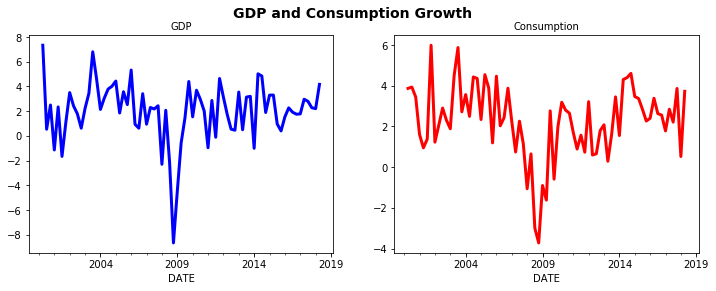

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4)) 

# Same deal as before, but here in the subplots we specified how many. This is given by
# the number of rows and columns for which the plots will be...
# the sharex command tells it to share the same x-axis, the figsize is awayt to controll
# how big/small it looksin the jupyter window

# IMPORTANT... now ax is multi-dimensional, so there are two of these, thus when we call 
# ax[0] this specifies use that axes or modify that one....

usdata.gdp_growth.plot(ax = ax[0], color = 'b', linewidth = 3.0) # Same idea, but specify
                                                           #that the first axes is for GDP
usdata.cons_growth.plot(ax = ax[1], color = 'r', linewidth = 3.0)

# Again, note how I'm saying gdp growth is the first axes and consumption growth is the second axes...

#######################################################################################

# Now liets make it nice looking...add a Title for everything...

fig.suptitle("GDP and Consumption Growth", fontsize = 14, fontweight = "bold")

ax[0].set_title("GDP", fontsize = 10) # This stuff sets the title for each of the subplots...
ax[1].set_title("Consumption", fontsize = 10)

**BOOM!** That was awesome, two nice looking graphs illustrating how GDP growth and Consumption growth have fluctuated over the past 12 years...



---
### Time to practice


- Can you create a new code cell and do the followng...

- Can you do the same type of plot but GDP and Net-Exports? What do you see?

- Challangeing: Can you plot a horizontal line indicating the average growth rate of this time period?


#### Styles
Matplotlib has a lot of basic settings for graphs. If we find some we like, we can set them once and be done with it. Or we can use some of their preset combinations, which they call **styles**.

You can find the built-in styles in this [website](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

You will learn how to change and set the styles now!


Text(0.5,1,'Consumption')

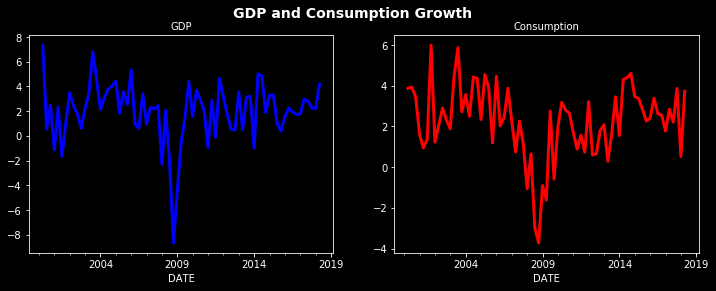

In [29]:
plt.style.use('dark_background')

fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4)) 

# Same deal as before, but here in the subplots we specified how many. This is given by
# the number of rows and columns for which the plots will be...
# the sharex command tells it to share the same x-axis, the figsize is awayt to controll
# how big/small it looksin the jupyter window

# IMPORTANT... now ax is multi-dimensional, so there are two of these, thus when we call 
# ax[0] this specifies use that axes or modify that one....

usdata.gdp_growth.plot(ax = ax[0], color = 'b', linewidth = 3.0) # Same idea, but specify
                                                           #that the first axes is for GDP
usdata.cons_growth.plot(ax = ax[1], color = 'r', linewidth = 3.0)

# Again, note how I'm saying gdp growth is the first axes and consumption growth is the second axes...

#######################################################################################

# Now liets make it nice looking...add a Title for everything...

fig.suptitle("GDP and Consumption Growth", fontsize = 14, fontweight = "bold")

ax[0].set_title("GDP", fontsize = 10) # This stuff sets the title for each of the subplots...
ax[1].set_title("Consumption", fontsize = 10)



Another style...

Text(0.5,1,'Consumption')

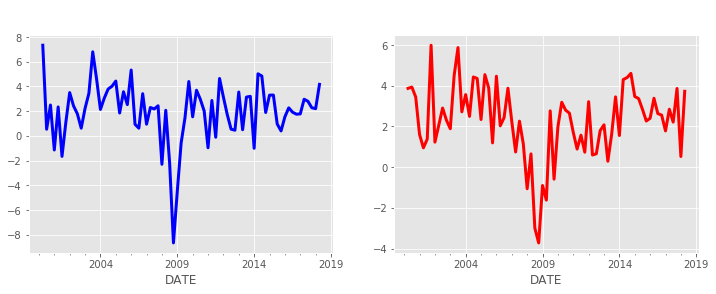

In [30]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4)) 

# Same deal as before, but here in the subplots we specified how many. This is given by
# the number of rows and columns for which the plots will be...
# the sharex command tells it to share the same x-axis, the figsize is awayt to controll
# how big/small it looksin the jupyter window

# IMPORTANT... now ax is multi-dimensional, so there are two of these, thus when we call 
# ax[0] this specifies use that axes or modify that one....

usdata.gdp_growth.plot(ax = ax[0], color = 'b', linewidth = 3.0) # Same idea, but specify
                                                           #that the first axes is for GDP
usdata.cons_growth.plot(ax = ax[1], color = 'r', linewidth = 3.0)

# Again, note how I'm saying gdp growth is the first axes and consumption growth is the second axes...

#######################################################################################

# Now liets make it nice looking...add a Title for everything...

fig.suptitle("GDP and Consumption Growth", fontsize = 14, fontweight = "bold")

ax[0].set_title("GDP", fontsize = 10) # This stuff sets the title for each of the subplots...
ax[1].set_title("Consumption", fontsize = 10)


You can find more styles in this [web](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

---
### Time to practice


**Exercise.** Try one of these styles: `bmh`, and `grayscale`.  Which ones do you like? Why?

**Exercise.** Can you use the style named `ggplot`? What does it look like?


---
## Review Questions


Consider the data from Randal Olson's [blog post](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/):

In [20]:
import pandas as pd
data = {'Food': ['French Fries', 'Potato Chips', 'Bacon', 'Pizza', 'Chili Dog'],
        'Calories per 100g':  [607, 542, 533, 296, 260]}
cals = pd.DataFrame(data)

The dataframe `cals` contains the calories in 100 grams of several different foods.




**Exercise.** We'll create and modify visualizations of this data:

* Set `'Food'` as the index of `cals`.
* Create a bar chart with `cals` using figure and axis objects.
* Add a title.
* Change the color of the bars.  What color do you prefer?
* Add the argument `alpha=0.5`.  What does it do?
* Change your chart to a horizontal bar chart.  Which do you prefer?
* *Challenging.*  Eliminate the legend.
* *Challenging.*  Skim the top of Olson's [blog post](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/). What do you see that you'd like to imitate?


---
## Summary

**Congratulations!** First, it's really amazing that you have learned so much in this course. You not only know how to presesnt your results via **Graphs**, but you learn how to choose different types of graphs and various options to generate publicity graph...AMAZING!!! Let us summarize some key things that we covered.

* **Graph Types**: 
    * When we want to analysis a trend (time series data), we use line chart while bar chart is good for cross sectional data analysis
    * Histogram and scatter plots are well suited for performing univariate distribution analysis: 
    * We talked about other charts such as area, pie or heatmap. They are not so commonly used, but might be helpful for your particular illustration purposes. 
 
* **Graph Options**: 
    * Review the graph basic options such as setting titles and labels, besides know how to set axis limits and save graphs.
    * Try to add Annotations for sometime data points in data.
    * How to use subplots functions.
    * How to change styles.
    